# Comparison of data gathered from VM (4GB) and IVORY Machine for CAT Vehicle and Sparkle Simulation

In [68]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
from pylab import rcParams
import os.path
import strym
from strym import strymread

## Get the data location

In [69]:
homedir = os.path.expanduser("~")
data_folder = homedir + '/CyverseData/ProjectSparkle'
sparkle_reu_machine_1 = 'sparkle_n_1_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-18-23-52-28'
sparkle_reu_machine_2 = 'sparkle_n_1_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-19-07-09-11'

catvehicle_reu_machine_1 = 'catvehicle_n_1_update_rate_100.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-19-14-19-51'
catvehicle_reu_machine_2 = 'catvehicle_n_1_update_rate_100.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-18-23-38-24'

sparkle_ivory_machine_1 =  'sparkle_n_1_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-18-16-23-33'
sparkle_ivory_machine_2 =  'sparkle_n_1_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-19-08-04-53'

catvehicle_ivory_machine_1 =  'catvehicle_n_1_update_rate_100.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-18-17-41-44'
catvehicle_ivory_machine_2 =  'catvehicle_n_1_update_rate_100.0_max_update_rate_100.0_time_step_0.01_logtime_300.0_2020-03-18-17-03-34'

folders = [data_folder + '/' + catvehicle_reu_machine_1, 
           data_folder + '/' + catvehicle_reu_machine_2, 
           data_folder + '/' + catvehicle_ivory_machine_1, 
           data_folder + '/' + catvehicle_ivory_machine_2, 
           data_folder + '/' + sparkle_reu_machine_1, 
           data_folder + '/' + sparkle_reu_machine_2, 
           data_folder + '/' + sparkle_ivory_machine_1, 
           data_folder + '/' + sparkle_ivory_machine_2]

odom_file = 'magna-odom.csv'
gzstat_file = '_gzStats.txt'

data = [catvehicle_reu_machine_1,catvehicle_reu_machine_2, 
        catvehicle_ivory_machine_1,catvehicle_ivory_machine_2, 
        sparkle_reu_machine_1, sparkle_reu_machine_2,
        sparkle_ivory_machine_1, sparkle_ivory_machine_2]

gzfiles = [data_folder + '/' + f +'/'+ f+ gzstat_file   for f in data]

In [70]:
odom_df_array = []
X_array =  []
Y_array = []
gz_array = []
for i, folder in enumerate(folders):
    data = folder + '/' + odom_file
    odom_df = pd.read_csv(data)
    odom_df_array.append(odom_df)
    newdf1 = pd.DataFrame()
    newdf1['Time'] = odom_df['Time']
    newdf1['Message'] = odom_df['PoseX']
    X_array.append(newdf1)
    newdf2 = pd.DataFrame()
    newdf2['Time'] = odom_df['Time']
    newdf2['Message'] = odom_df['PoseY']
    
    print(newdf1['Message'].shape, newdf2['Message'].shape)
    
    Y_array.append(newdf2)
    

(29546,) (29546,)
(29457,) (29457,)
(29880,) (29880,)
(29800,) (29800,)
(29978,) (29978,)
(29977,) (29977,)
(29981,) (29981,)
(29980,) (29980,)


In [71]:
def bestshift(source, destination):
    '''
    Find the best shift to match destination with source signal.
    Returns a shifted version of destination signal.
    
    We will shift signals by one step starting from min= -100 to max = 100 and return correlation coefficient.
    
    We will only be using first 500 points to calculate correlation coefficient.
    '''
    corr_coeff = []
    shift  = []
    
    for sh in range(-100, 101):
        shifted_destination = destination.shift(sh)['Message']
        shifted_destination = shifted_destination.dropna()
        shifted_destination = shifted_destination.iloc[0:500]
        truncated_source = source['Message'].iloc[0:500]
        rms = sqrt(mean_squared_error(truncated_source, shifted_destination))
        #C = np.corrcoef(source['Message'].iloc[0:50], destination.shift(sh)['Message'].iloc[0:50])
        if math.isnan(rms):
            continue
        #if math.isnan(C[0][1]): 
        #    continue
        #corr_coeff.append(C[0][1])
        corr_coeff.append(rms)
        print("Minimum RMS so far is {} and required shift is {}".format(np.min(corr_coeff),np.argmin(corr_coeff) ))
        shift.append(sh)
    
    min_index = np.argmin(corr_coeff)
    required_shift = shift[min_index]
    print('Required Shift is {}'.format(required_shift))
    destination['Message'] = destination['Message'].shift(required_shift)
    return destination

Text(0, 0.5, 'X-Coordinates')

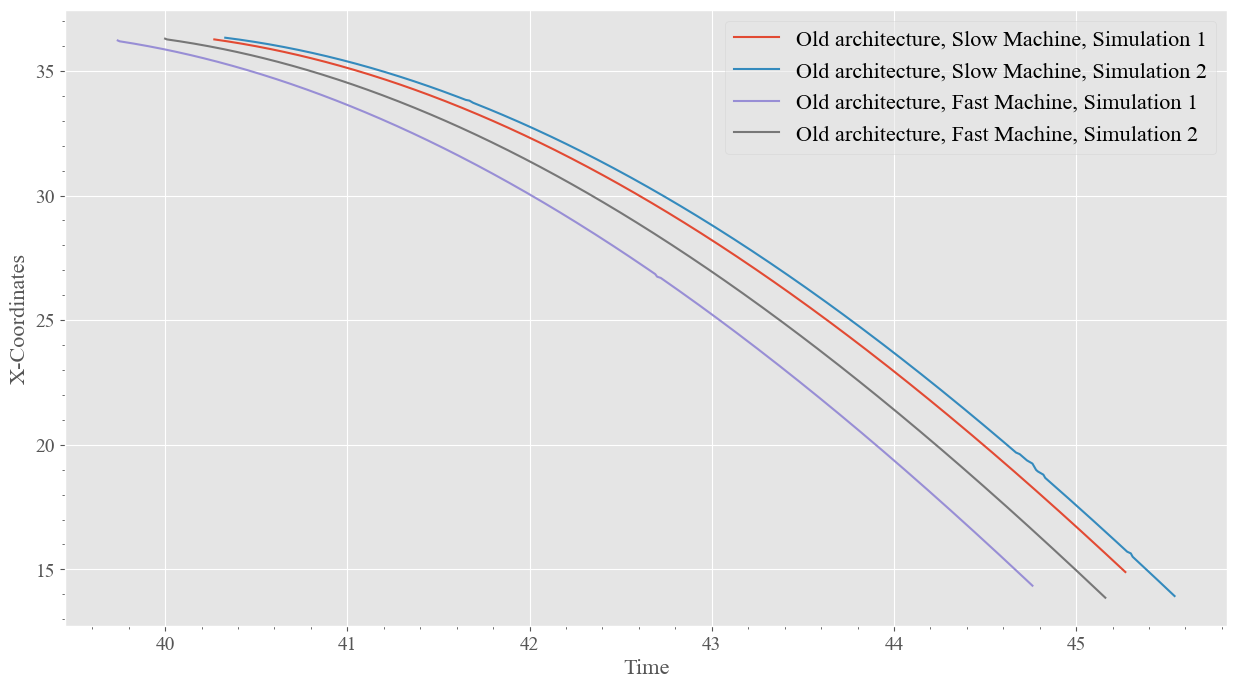

In [72]:
# We will find shift between two signals
x1 = X_array[0]['Message'] #catvehicle_reu_machine_1
x2 = X_array[1]['Message'] # catvehicle_reu_machine_2
rcParams['figure.figsize'] = 15, 8
plt.plot(X_array[0]['Time'].iloc[0:500],X_array[0]['Message'].iloc[0:500] )
plt.plot(X_array[1]['Time'].iloc[0:500],X_array[1]['Message'].iloc[0:500] )
plt.plot(X_array[2]['Time'].iloc[0:500],X_array[2]['Message'].iloc[0:500] )
plt.plot(X_array[3]['Time'].iloc[0:500],X_array[3]['Message'].iloc[0:500] )
plt.legend(['Old architecture, Slow Machine, Simulation 1',
            'Old architecture, Slow Machine, Simulation 2',
            'Old architecture, Fast Machine, Simulation 1',
            'Old architecture, Fast Machine, Simulation 2'], fontsize = 16)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('X-Coordinates', fontsize = 16)

Text(0, 0.5, 'X-Coordinates')

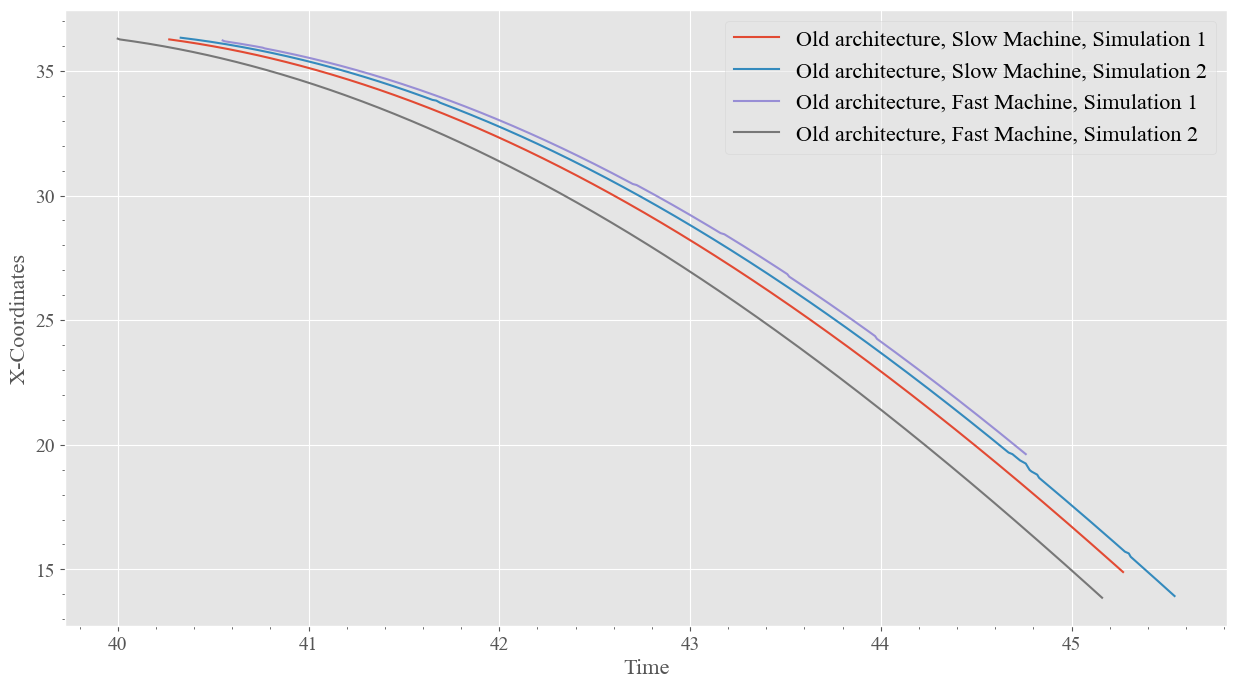

In [73]:
# We will find shift between two signals
x1 = X_array[0]['Message']
x2 = X_array[1]['Message']
plt.plot(X_array[0]['Time'].iloc[0:500],X_array[0]['Message'].iloc[0:500] )
plt.plot(X_array[1]['Time'].iloc[0:500],X_array[1]['Message'].iloc[0:500] )
plt.plot(X_array[2]['Time'].iloc[0:500],X_array[2]['Message'].shift(80).iloc[0:500] )
plt.plot(X_array[3]['Time'].iloc[0:500],X_array[3]['Message'].iloc[0:500] )
#plt.plot(X_array[4]['Time'].iloc[0:500],X_array[4]['Message'].iloc[0:500] )
#plt.plot(X_array[5]['Time'].iloc[0:500],X_array[5]['Message'].iloc[0:500] )
#plt.plot(X_array[6]['Time'].iloc[0:500],X_array[6]['Message'].iloc[0:500] )
#plt.plot(X_array[7]['Time'].iloc[0:500],X_array[7]['Message'].iloc[0:500] )
#plt.legend(['1','2','3','4','5','6','7','8'])
plt.legend(['Old architecture, Slow Machine, Simulation 1',
            'Old architecture, Slow Machine, Simulation 2',
            'Old architecture, Fast Machine, Simulation 1',
            'Old architecture, Fast Machine, Simulation 2'], fontsize = 16)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('X-Coordinates', fontsize = 16)

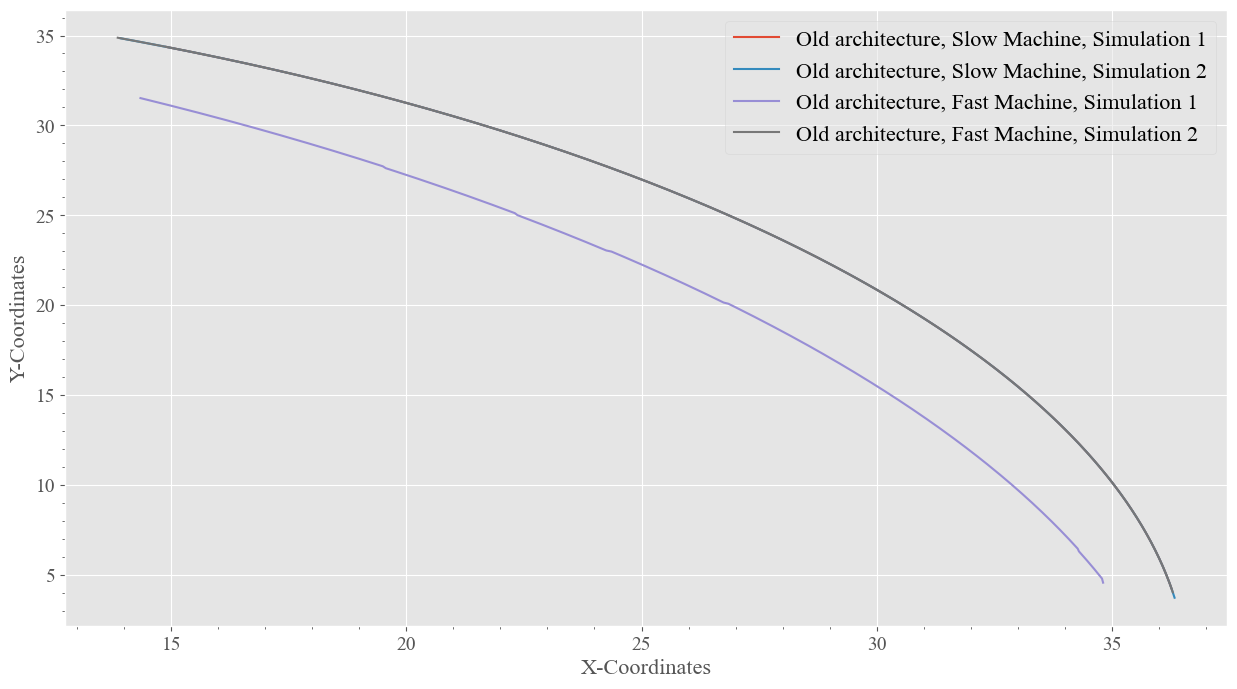

In [74]:
# We will find shift between two signals
x1 = X_array[0]['Message']
x2 = X_array[1]['Message']
plt.plot(X_array[0]['Message'].iloc[0:500],Y_array[0]['Message'].iloc[0:500] )
plt.plot(X_array[1]['Message'].iloc[0:500],Y_array[1]['Message'].iloc[0:500] )
plt.plot(X_array[2]['Message'].iloc[0:500],Y_array[2]['Message'].shift(80).iloc[0:500] )
plt.plot(X_array[3]['Message'].iloc[0:500],Y_array[3]['Message'].iloc[0:500] )
#plt.plot(X_array[4]['Time'].iloc[0:500],X_array[4]['Message'].iloc[0:500] )
#plt.plot(X_array[5]['Time'].iloc[0:500],X_array[5]['Message'].iloc[0:500] )
#plt.plot(X_array[6]['Time'].iloc[0:500],X_array[6]['Message'].iloc[0:500] )
#plt.plot(X_array[7]['Time'].iloc[0:500],X_array[7]['Message'].iloc[0:500] )
#plt.legend(['1','2','3','4','5','6','7','8'])
plt.legend(['Old architecture, Slow Machine, Simulation 1',
            'Old architecture, Slow Machine, Simulation 2',
            'Old architecture, Fast Machine, Simulation 1',
            'Old architecture, Fast Machine, Simulation 2'], fontsize = 16)
plt.xlabel('X-Coordinates', fontsize = 16)
plt.ylabel('Y-Coordinates', fontsize = 16)
plt.show()

Text(0, 0.5, 'X-Coordinates')

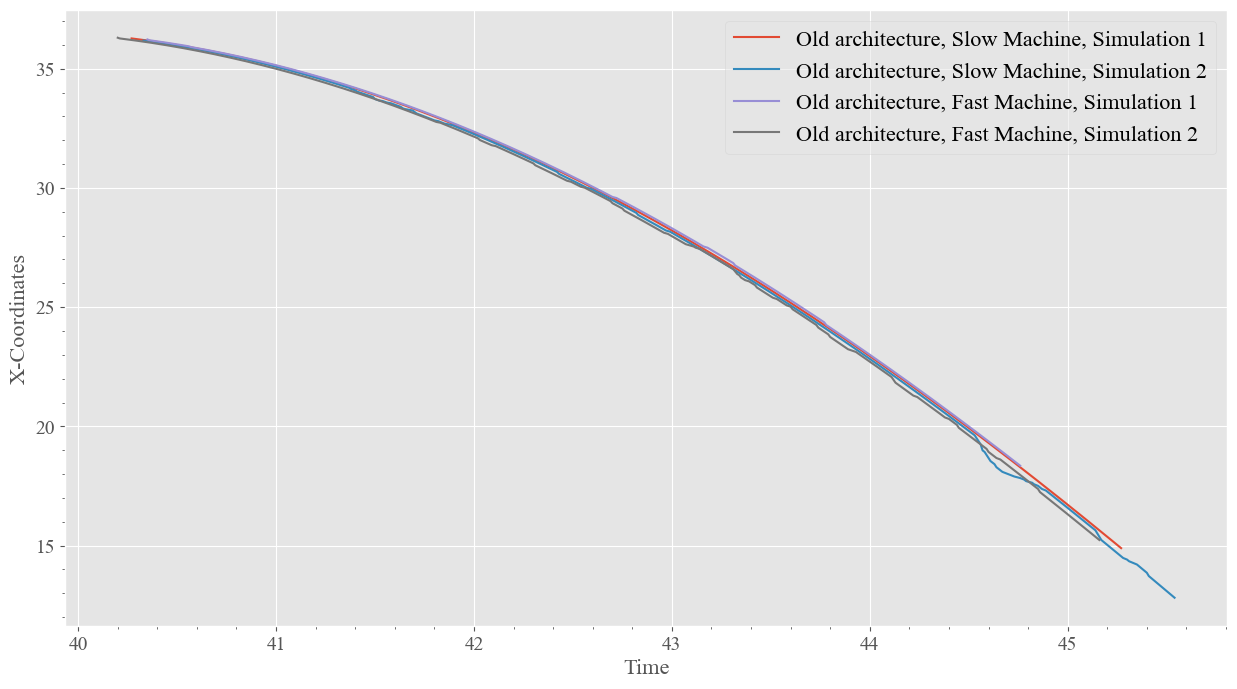

In [75]:
# I am manually aligning signals as I have not yet determined what's the best way to align signals automatically.
plt.plot(X_array[0]['Time'].iloc[0:500],X_array[0]['Message'].iloc[0:500] )
plt.plot(X_array[1]['Time'].iloc[0:500],X_array[1].shift(-15)['Message'].iloc[0:500] )
plt.plot(X_array[2]['Time'].iloc[0:500],X_array[2].shift(60)['Message'].iloc[0:500] )
plt.plot(X_array[3]['Time'].iloc[0:500],X_array[3].shift(20)['Message'].iloc[0:500] )
plt.legend(['Old architecture, Slow Machine, Simulation 1',
            'Old architecture, Slow Machine, Simulation 2',
            'Old architecture, Fast Machine, Simulation 1',
            'Old architecture, Fast Machine, Simulation 2'], fontsize = 16)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('X-Coordinates', fontsize = 16)

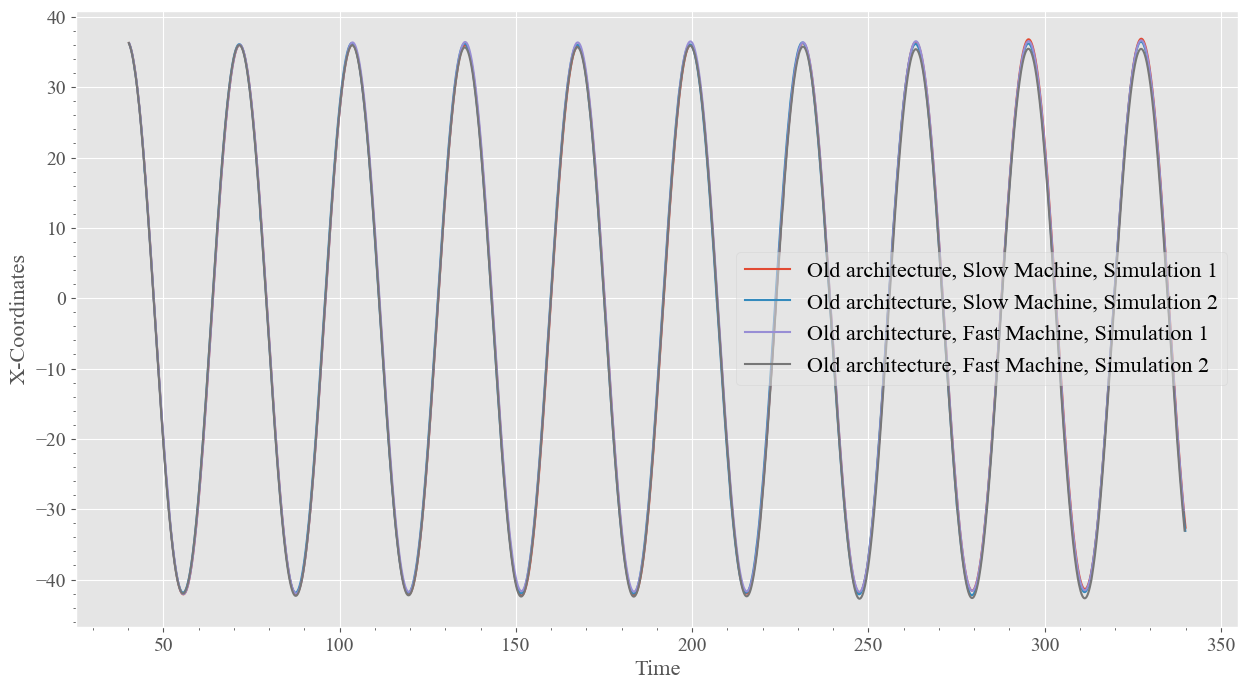

In [76]:
plt.plot(X_array[0]['Time'],X_array[0]['Message'] )
plt.plot(X_array[1]['Time'],X_array[1].shift(-15)['Message'])
plt.plot(X_array[2]['Time'],X_array[2].shift(60)['Message'] )
plt.plot(X_array[3]['Time'],X_array[3].shift(20)['Message'] )
plt.legend(['Old architecture, Slow Machine, Simulation 1',
            'Old architecture, Slow Machine, Simulation 2',
            'Old architecture, Fast Machine, Simulation 1',
            'Old architecture, Fast Machine, Simulation 2'], fontsize = 16)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('X-Coordinates', fontsize = 16)

X_array[1]['Message'] = X_array[1].shift(-15)['Message']
X_array[1] = X_array[1].dropna()
X_array[2]['Message'] = X_array[1].shift(60)['Message']
X_array[2] = X_array[2].dropna()
X_array[3]['Message'] = X_array[1].shift(20)['Message']
X_array[3] = X_array[3].dropna()

Y_array[1]['Message'] = Y_array[1].shift(-15)['Message']
Y_array[1] = Y_array[1].dropna()
Y_array[2]['Message'] = Y_array[1].shift(60)['Message']
Y_array[2] = Y_array[2].dropna()
Y_array[3]['Message'] = Y_array[1].shift(20)['Message']
Y_array[3] = Y_array[3].dropna()

Text(0, 0.5, 'X-Coordinates')

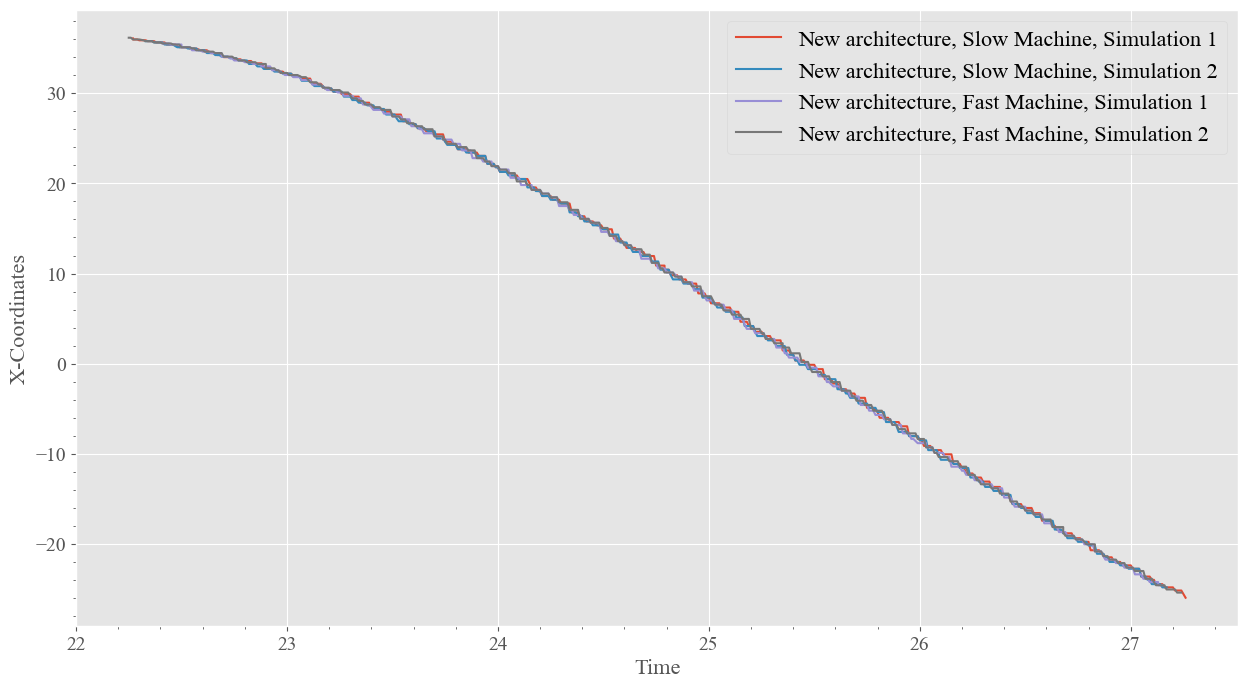

In [77]:
plt.plot(X_array[4]['Time'].iloc[0:500],X_array[4]['Message'].iloc[0:500] )
plt.plot(X_array[5]['Time'].iloc[0:500],X_array[5].shift(15)['Message'].iloc[0:500] )
plt.plot(X_array[6]['Time'].iloc[0:500],X_array[6].shift(25)['Message'].iloc[0:500] )
plt.plot(X_array[7]['Time'].iloc[0:500],X_array[7].shift(-10)['Message'].iloc[0:500] )
plt.legend(['New architecture, Slow Machine, Simulation 1',
            'New architecture, Slow Machine, Simulation 2',
            'New architecture, Fast Machine, Simulation 1',
            'New architecture, Fast Machine, Simulation 2'], fontsize = 16)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('X-Coordinates', fontsize = 16)


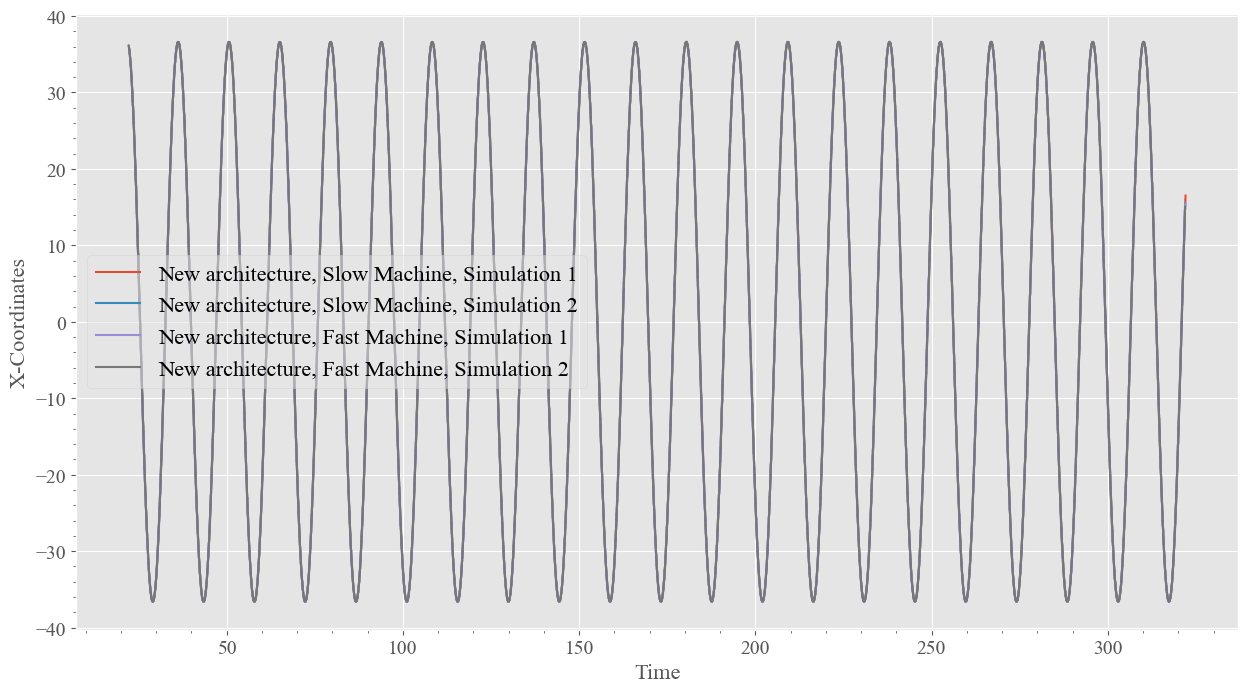

In [78]:
plt.plot(X_array[4]['Time'],X_array[4]['Message'] )
plt.plot(X_array[5]['Time'],X_array[5].shift(15)['Message'] )
plt.plot(X_array[6]['Time'],X_array[6].shift(25)['Message'] )
plt.plot(X_array[7]['Time'],X_array[7].shift(-10)['Message'])
plt.legend(['New architecture, Slow Machine, Simulation 1',
            'New architecture, Slow Machine, Simulation 2',
            'New architecture, Fast Machine, Simulation 1',
            'New architecture, Fast Machine, Simulation 2'], fontsize = 16)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('X-Coordinates', fontsize = 16)

X_array[5]['Message'] = X_array[5].shift(15)['Message'] 
X_array[5] = X_array[5].dropna()
X_array[6]['Message'] = X_array[6].shift(25)['Message'] 
X_array[6] = X_array[6].dropna()
X_array[7]['Message'] = X_array[7].shift(-10)['Message']
X_array[7] = X_array[7].dropna()

Y_array[5]['Message'] = Y_array[5].shift(15)['Message'] 
Y_array[5] = Y_array[5].dropna()
Y_array[6]['Message'] = Y_array[6].shift(25)['Message'] 
Y_array[6] = Y_array[6].dropna()
Y_array[7]['Message'] = Y_array[7].shift(-10)['Message']
Y_array[7] = Y_array[7].dropna()

## We will resample the two timeseries  to calculate root mean square error.
### Older approach

In [79]:
print(X_array[0].shape, X_array[1].shape)
print(Y_array[0].shape, Y_array[1].shape)

(29546, 2) (29442, 2)
(29546, 2) (29442, 2)


Room Mean Square Error between Two Simulations performed on Slow Computer was 0.6978197880777198


/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Error metric between Two Simulations performed on Slow Computer was 0.9533003454759932


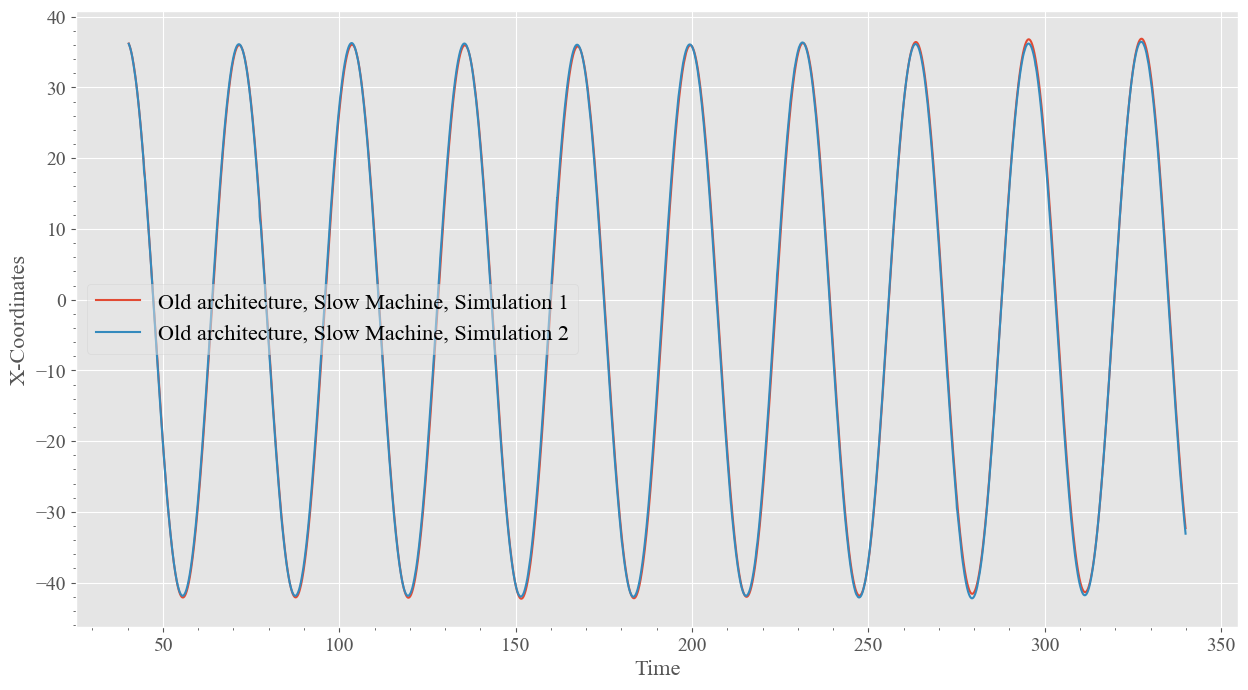

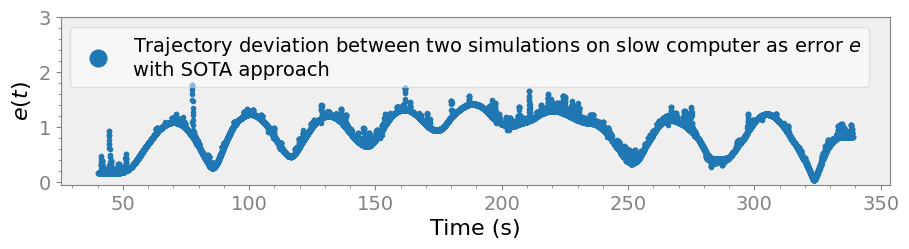

In [80]:
X0_new, X1_new = strymread.ts_sync(X_array[0], X_array[1])
Y0_new, Y1_new = strymread.ts_sync(Y_array[0], Y_array[1])
plt.plot(X0_new['Time'], X0_new['Message'])
plt.plot(X1_new['Time'], X1_new['Message'])
plt.legend(['Old architecture, Slow Machine, Simulation 1',
            'Old architecture, Slow Machine, Simulation 2'], fontsize = 16)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('X-Coordinates', fontsize = 16)
rms = sqrt(mean_squared_error(X0_new['Message'],X1_new['Message']))
print('Room Mean Square Error between Two Simulations performed on Slow Computer was {}'.format(rms))

RMS = np.sqrt (  (X0_new['Message'][:-50]  - X1_new['Message'][:-50])**2  + (Y0_new['Message'][:-50]  - Y1_new['Message'][:-50])**2  )

RMS_df = pd.DataFrame(RMS)
RMS_df['Time'] = X0_new['Time'][:-50]

fig, ax = strymread.create_fig(1)
fig.set_figwidth(9)
fig.set_figheight(2)
ax[0].plot(RMS_df['Time'], RMS_df['Message'], marker = 'o', markersize = 3, linewidth = 0)

ax[0].legend(['Trajectory deviation between two simulations on slow computer as error $e$\nwith SOTA approach'], fontsize = 14, loc = 'upper left')
ax[0].set_ylim(top = 3)
ax[0].set_xlabel('Time (s)', fontsize = 16)
ax[0].set_ylabel(r'$e(t)$', fontsize = 16)
ax[0].grid(False, which='both')
fig.savefig("error_new.png", dpi = 100, bbox_inches='tight', transparent=False)
fig.savefig("error_new.pdf", facecolor=(1,1,1,0), dpi = 40, bbox_inches='tight', transparent=False)
fig.show()

E = np.sqrt(np.mean(RMS_df['Message']**2))

print('Error metric between Two Simulations performed on Slow Computer was {}'.format(E))

Room Mean Square Error between Two Simulations performed on IVORY Computer was 2.38449903128022


/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Error metric between Two Simulations performed on fast Computer was 3.3381553143482314


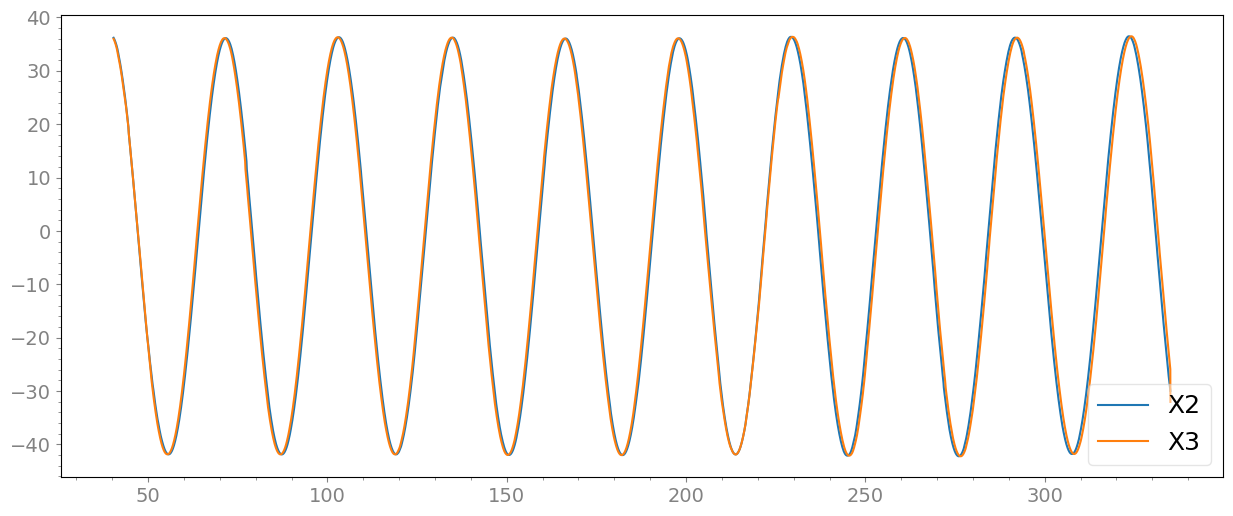

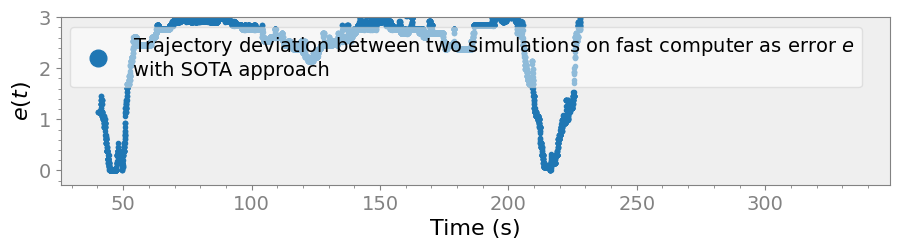

In [52]:
X2_new, X3_new = strymread.ts_sync(X_array[2], X_array[3])
Y2_new, Y3_new = strymread.ts_sync(Y_array[2], Y_array[3])
plt.plot(X2_new['Time'], X2_new['Message'])
plt.plot(X3_new['Time'], X3_new['Message'])
plt.legend(['X2', 'X3'])
rms = sqrt(mean_squared_error(X2_new['Message'],X3_new['Message']))
print('Room Mean Square Error between Two Simulations performed on IVORY Computer was {}'.format(rms))

RMS = np.sqrt (  (X2_new['Message'][:-50]  - X3_new['Message'][:-50])**2  + \
               (Y2_new['Message'][:-50]  - Y3_new['Message'][:-50])**2  )

RMS_df = pd.DataFrame(RMS)
RMS_df['Time'] = X2_new['Time'][:-50]

fig, ax = strymread.create_fig(1)
fig.set_figwidth(9)
fig.set_figheight(2)
ax[0].plot(RMS_df['Time'], RMS_df['Message'], marker = 'o', markersize = 3, linewidth = 0)

ax[0].legend(['Trajectory deviation between two simulations on fast computer as error $e$\nwith SOTA approach'], fontsize = 14, loc = 'upper left')
ax[0].set_ylim(top = 3)
ax[0].set_xlabel('Time (s)', fontsize = 16)
ax[0].set_ylabel(r'$e(t)$', fontsize = 16)
ax[0].grid(False, which='both')
fig.savefig("error_new.png", dpi = 100, bbox_inches='tight', transparent=False)
fig.savefig("error_new.pdf", facecolor=(1,1,1,0), dpi = 40, bbox_inches='tight', transparent=False)
fig.show()

E = np.sqrt(np.mean(RMS_df['Message']**2))

print('Error metric between Two Simulations performed on fast Computer was {}'.format(E))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 10.64410053678389


/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Error metric between Two Simulations performed on Slow and fast Computer was 14.746268450604143


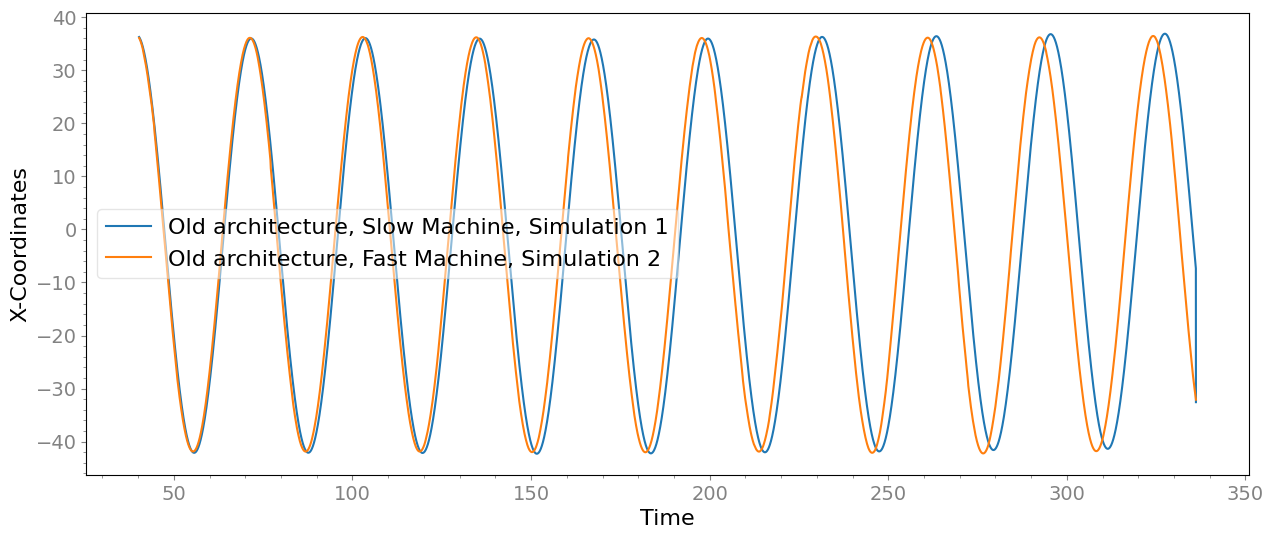

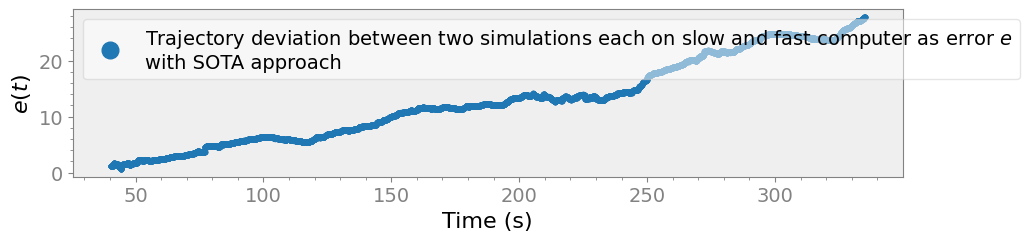

In [53]:
X0_new, X3_new = strymread.ts_sync(X_array[0], X_array[3])
Y0_new, Y3_new = strymread.ts_sync(Y_array[0], Y_array[3])
plt.plot(X0_new['Time'], X0_new['Message'])
plt.plot(X3_new['Time'], X3_new['Message'])
plt.legend(['X0', 'X3'])



plt.legend(['Old architecture, Slow Machine, Simulation 1',
            'Old architecture, Fast Machine, Simulation 2'], fontsize = 16)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('X-Coordinates', fontsize = 16)

rms = sqrt(mean_squared_error(X0_new['Message'],X3_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

RMS = np.sqrt (  (X0_new['Message'][:-50]  - X3_new['Message'][:-50])**2  + \
               (Y0_new['Message'][:-50]  - Y3_new['Message'][:-50])**2  )

RMS_df = pd.DataFrame(RMS)
RMS_df['Time'] = X0_new['Time'][:-50]

fig, ax = strymread.create_fig(1)
fig.set_figwidth(9)
fig.set_figheight(2)
ax[0].plot(RMS_df['Time'], RMS_df['Message'], marker = 'o', markersize = 3, linewidth = 0)

ax[0].legend(['Trajectory deviation between two simulations each on slow and fast computer as error $e$\nwith SOTA approach'], fontsize = 14, loc = 'upper left')
#ax[0].set_ylim(top = 6)
ax[0].set_xlabel('Time (s)', fontsize = 16)
ax[0].set_ylabel(r'$e(t)$', fontsize = 16)
ax[0].grid(False, which='both')
fig.savefig("error_new.png", dpi = 100, bbox_inches='tight', transparent=False)
fig.savefig("error_new.pdf", facecolor=(1,1,1,0), dpi = 40, bbox_inches='tight', transparent=False)
fig.show()

E = np.sqrt(np.mean(RMS_df['Message']**2))

print('Error metric between Two Simulations performed on Slow and fast Computer was {}'.format(E))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 11.80049708014231


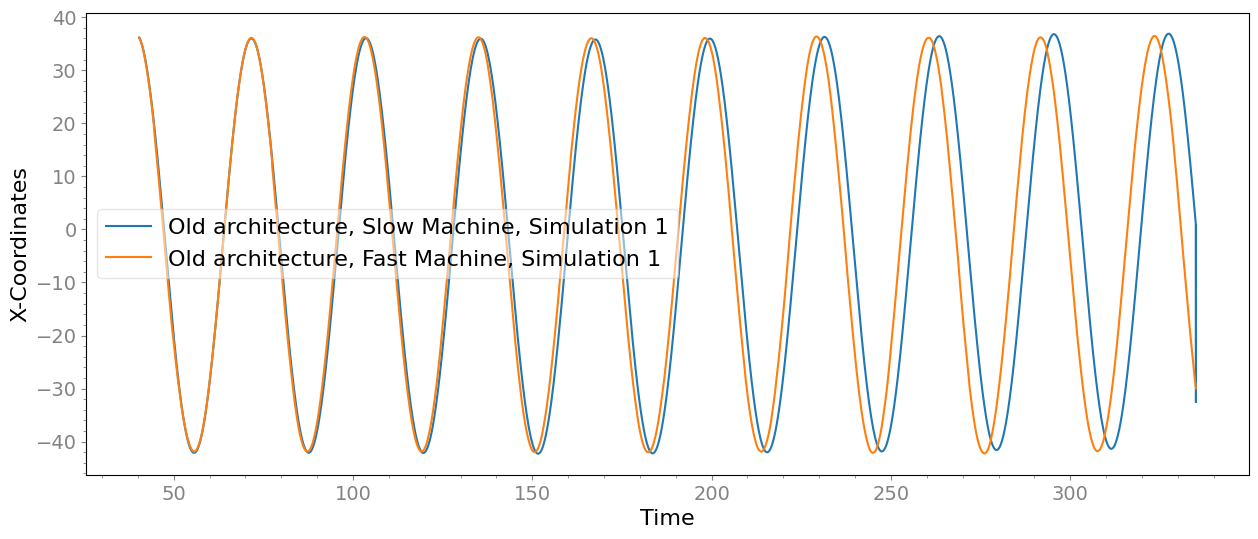

In [54]:
X0_new, X2_new = strymread.ts_sync(X_array[0], X_array[2], rate = 'first' , method = 'nearest')
Y0_new, Y2_new = strymread.ts_sync(Y_array[0], Y_array[2], rate = 'first',  method = 'nearest')

plt.plot(X0_new['Time'], X0_new['Message'])
plt.plot(X2_new['Time'], X2_new['Message'])


plt.legend(['Old architecture, Slow Machine, Simulation 1',
            'Old architecture, Fast Machine, Simulation 1'], fontsize = 16)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('X-Coordinates', fontsize = 16)


rms = sqrt(mean_squared_error(X0_new['Message'],X2_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


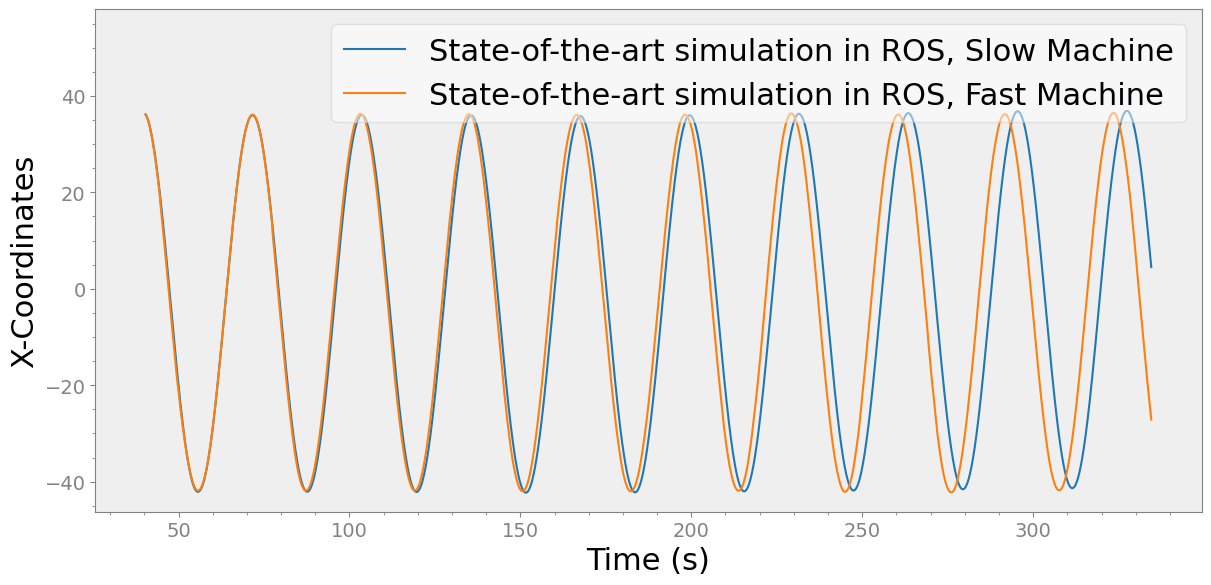

In [55]:
fig, ax = strymread.create_fig(1)
fig.set_figwidth(12)

ax[0].plot(X0_new['Time'][:-50], X0_new['Message'][:-50])
ax[0].plot(X2_new['Time'][:-50], X2_new['Message'][:-50])

ax[0].legend(['State-of-the-art simulation in ROS, Slow Machine',
            'State-of-the-art simulation in ROS, Fast Machine'], fontsize = 22, loc = 'upper right')
ax[0].set_ylim(top = 58)
ax[0].set_xlabel('Time (s)', fontsize = 22)
ax[0].set_ylabel('X-Coordinates', fontsize = 22)
ax[0].grid(False, which='both')
fig.savefig("xcoordcomparison.png", dpi = 100, bbox_inches='tight', transparent=False)
fig.savefig("xcoordcomparison.pdf", facecolor=(1,1,1,0), dpi = 40, bbox_inches='tight', transparent=False)
fig.show()

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


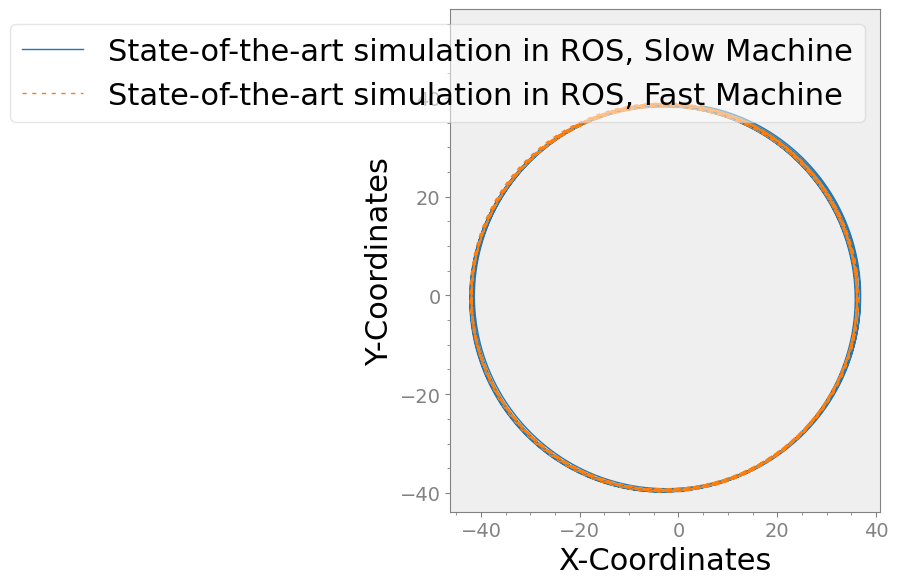

In [56]:
fig, ax = strymread.create_fig(1)
fig.set_figwidth(12)
ax[0].plot(X0_new['Message'][:-50], Y0_new['Message'][:-50], linewidth = 1)
ax[0].plot(X2_new['Message'][:-50], Y2_new['Message'][:-50], dashes = [3,4,3,4], linewidth = 1)

ax[0].legend(['State-of-the-art simulation in ROS, Slow Machine',
            'State-of-the-art simulation in ROS, Fast Machine'], fontsize = 22, loc = 'upper right')
ax[0].set_ylim(top = 58)
ax[0].set_xlabel('X-Coordinates', fontsize = 22)
ax[0].set_ylabel('Y-Coordinates', fontsize = 22)
ax[0].grid(False, which='both')
ax[0].set_aspect('equal', adjustable='box')

fig.show()

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Error metric between Two Simulations performed on Slow and fast Computer was 16.403607766861306


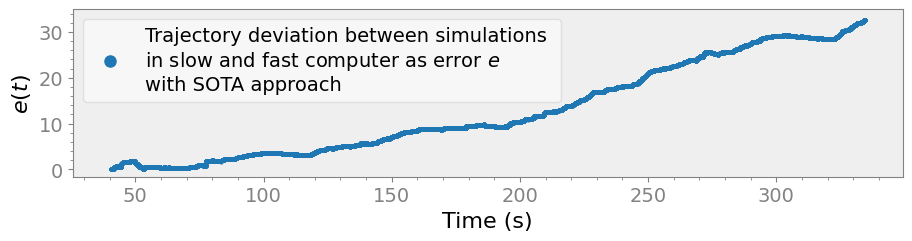

In [57]:
RMS = np.sqrt (  (X2_new['Message'][:-50]  - X0_new['Message'][:-50])**2  + (Y2_new['Message'][:-50]  - Y0_new['Message'][:-50])**2  )

RMS_df = pd.DataFrame(RMS)
RMS_df['Time'] = X2_new['Time'][:-50]

fig, ax = strymread.create_fig(1)
fig.set_figwidth(9)
fig.set_figheight(2)
ax[0].plot(RMS_df['Time'], RMS_df['Message'], marker = 'o', markersize = 2, linewidth = 0)

ax[0].legend(['Trajectory deviation between simulations \nin slow and fast computer as error $e$\nwith SOTA approach'], fontsize = 14, loc = 'upper left')
ax[0].set_ylim(top = 35)
ax[0].set_xlabel('Time (s)', fontsize = 16)
ax[0].set_ylabel(r'$e(t)$', fontsize = 16)
ax[0].grid(False, which='both')
fig.savefig("error_old.png", dpi = 100, bbox_inches='tight', transparent=False)
fig.savefig("error_old.pdf", facecolor=(1,1,1,0), dpi = 40, bbox_inches='tight', transparent=False)
fig.show()


E = np.sqrt(np.mean(RMS_df['Message']**2))

print('Error metric between Two Simulations performed on Slow and fast Computer was {}'.format(E))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 11.38623189423091


/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Error metric between Two Simulations performed on Slow and fast Computer was 15.830156573575847


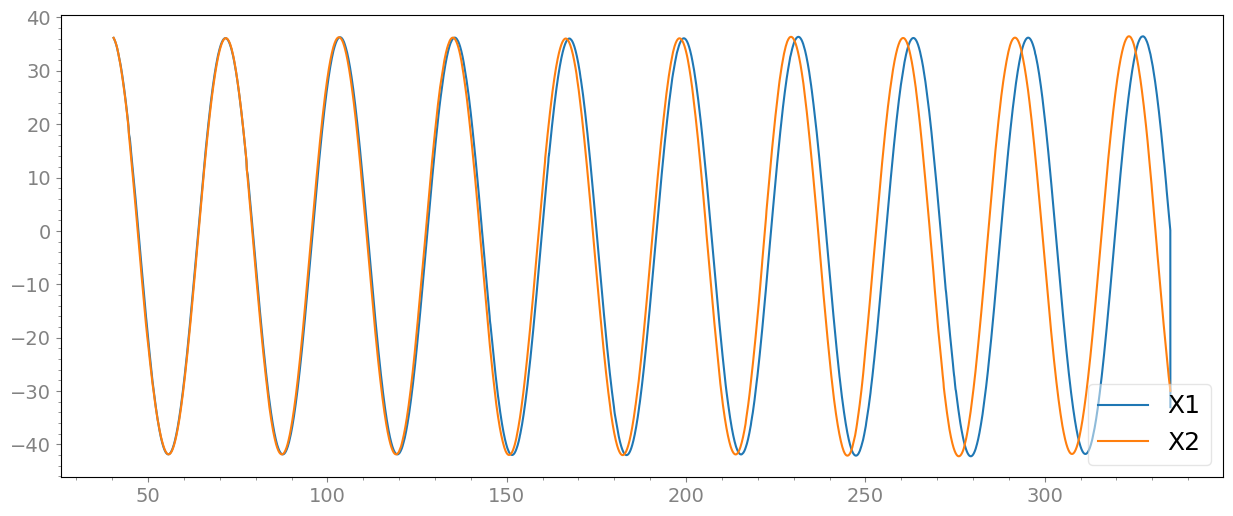

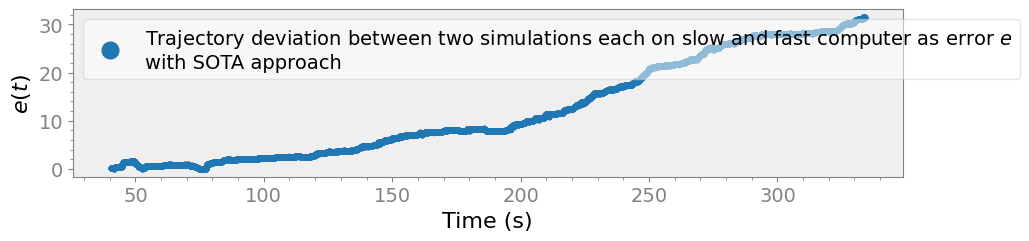

In [58]:
X1_new, X2_new = strymread.ts_sync(X_array[1], X_array[2])
Y1_new, Y2_new = strymread.ts_sync(Y_array[1], Y_array[2])
plt.plot(X1_new['Time'], X1_new['Message'])
plt.plot(X2_new['Time'], X2_new['Message'])
plt.legend(['X1', 'X2'])
rms = sqrt(mean_squared_error(X1_new['Message'],X2_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

RMS = np.sqrt (  (X1_new['Message'][:-50]  - X2_new['Message'][:-50])**2  + \
               (Y1_new['Message'][:-50]  - Y2_new['Message'][:-50])**2  )

RMS_df = pd.DataFrame(RMS)
RMS_df['Time'] = X1_new['Time'][:-50]

fig, ax = strymread.create_fig(1)
fig.set_figwidth(9)
fig.set_figheight(2)
ax[0].plot(RMS_df['Time'], RMS_df['Message'], marker = 'o', markersize = 3, linewidth = 0)

ax[0].legend(['Trajectory deviation between two simulations each on slow and fast computer as error $e$\nwith SOTA approach'], fontsize = 14, loc = 'upper left')
#ax[0].set_ylim(top = 6)
ax[0].set_xlabel('Time (s)', fontsize = 16)
ax[0].set_ylabel(r'$e(t)$', fontsize = 16)
ax[0].grid(False, which='both')
fig.savefig("error_new.png", dpi = 100, bbox_inches='tight', transparent=False)
fig.savefig("error_new.pdf", facecolor=(1,1,1,0), dpi = 40, bbox_inches='tight', transparent=False)
fig.show()

E = np.sqrt(np.mean(RMS_df['Message']**2))

print('Error metric between Two Simulations performed on Slow and fast Computer was {}'.format(E))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 10.169818369371056


/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Error metric between Two Simulations performed on Slow and fast Computer was 14.110143851467289


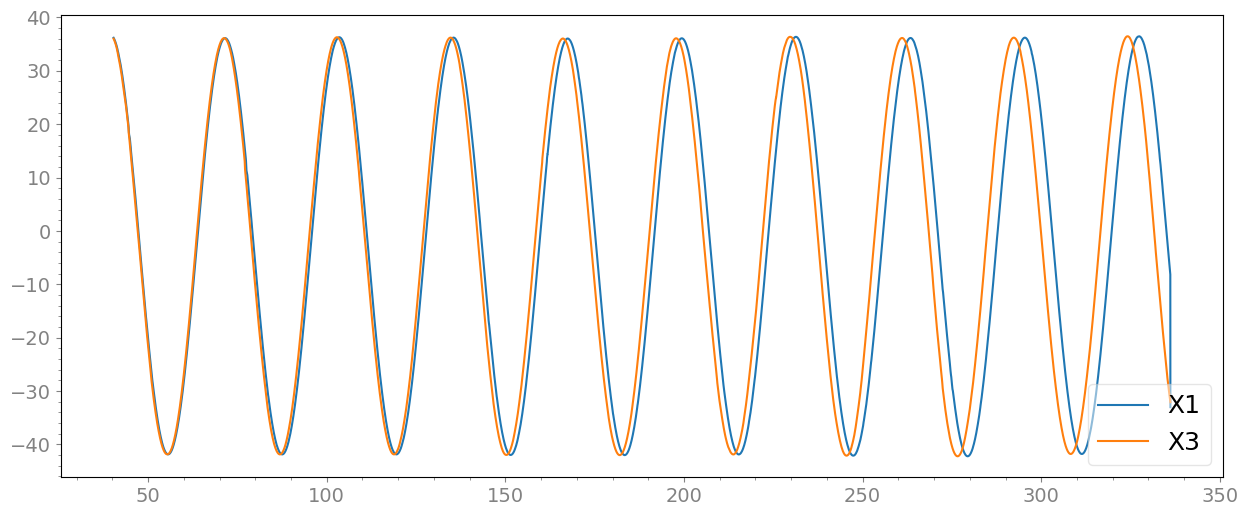

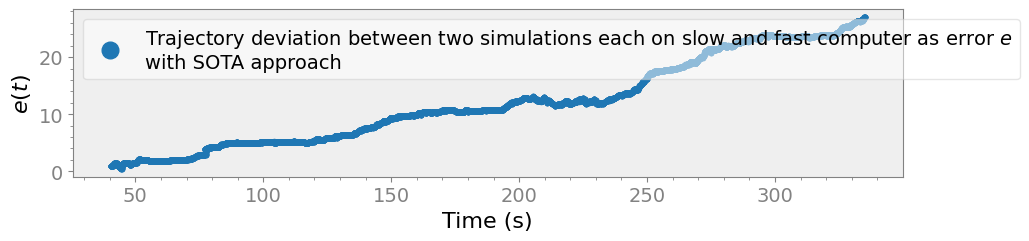

In [59]:
X1_new, X3_new = strymread.ts_sync(X_array[1], X_array[3])
Y1_new, Y3_new = strymread.ts_sync(Y_array[1], Y_array[3])
plt.plot(X1_new['Time'], X1_new['Message'])
plt.plot(X3_new['Time'], X3_new['Message'])
plt.legend(['X1', 'X3'])
rms = sqrt(mean_squared_error(X1_new['Message'],X3_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

RMS = np.sqrt (  (X1_new['Message'][:-50]  - X3_new['Message'][:-50])**2  + \
               (Y1_new['Message'][:-50]  - Y3_new['Message'][:-50])**2  )

RMS_df = pd.DataFrame(RMS)
RMS_df['Time'] = X1_new['Time'][:-50]

fig, ax = strymread.create_fig(1)
fig.set_figwidth(9)
fig.set_figheight(2)
ax[0].plot(RMS_df['Time'], RMS_df['Message'], marker = 'o', markersize = 3, linewidth = 0)

ax[0].legend(['Trajectory deviation between two simulations each on slow and fast computer as error $e$\nwith SOTA approach'], fontsize = 14, loc = 'upper left')
#ax[0].set_ylim(top = 6)
ax[0].set_xlabel('Time (s)', fontsize = 16)
ax[0].set_ylabel(r'$e(t)$', fontsize = 16)
ax[0].grid(False, which='both')
fig.savefig("error_new.png", dpi = 100, bbox_inches='tight', transparent=False)
fig.savefig("error_new.pdf", facecolor=(1,1,1,0), dpi = 40, bbox_inches='tight', transparent=False)
fig.show()

E = np.sqrt(np.mean(RMS_df['Message']**2))

print('Error metric between Two Simulations performed on Slow and fast Computer was {}'.format(E))

### Newer approach

Room Mean Square Error between Two Simulations performed on REU Computer was 0.28248298137657246


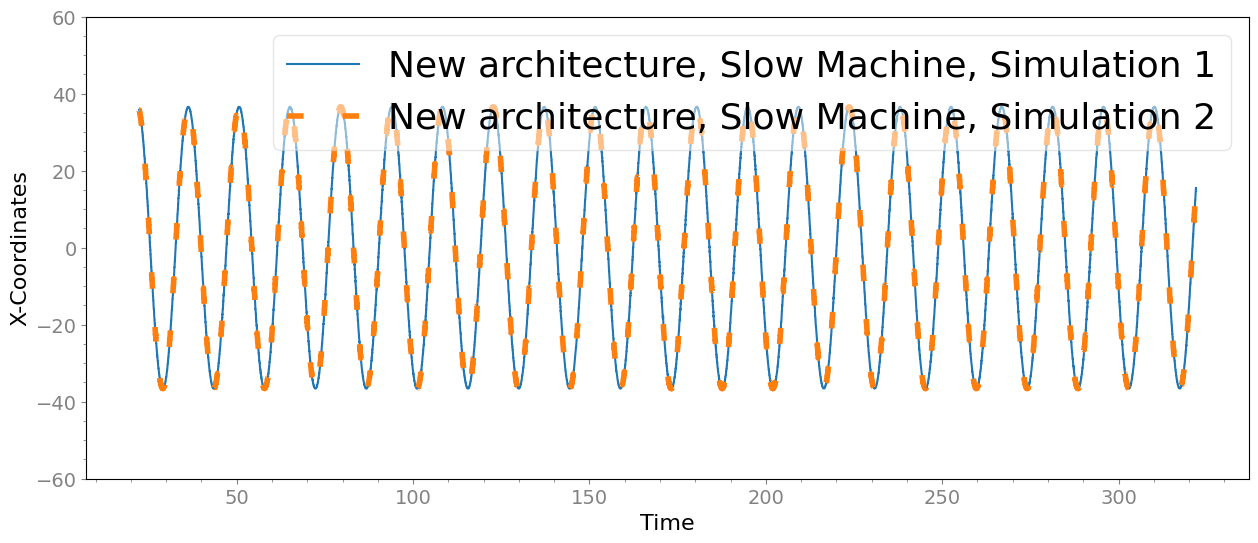

In [60]:
X4_new, X5_new = strymread.ts_sync(X_array[4], X_array[5])
Y4_new, Y5_new = strymread.ts_sync(Y_array[4], Y_array[5])
plt.plot(X4_new['Time'], X4_new['Message'])
plt.plot(X5_new['Time'], X5_new['Message'],dashes = [3, 7, 3, 7], linewidth=4)

plt.legend(['New architecture, Slow Machine, Simulation 1',
            'New architecture, Slow Machine, Simulation 2'], fontsize = 26, markerscale = 4)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('X-Coordinates', fontsize = 16)
plt.ylim(-60, 60)


rms = sqrt(mean_squared_error(X4_new['Message'],X5_new['Message']))
print('Room Mean Square Error between Two Simulations performed on REU Computer was {}'.format(rms))

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


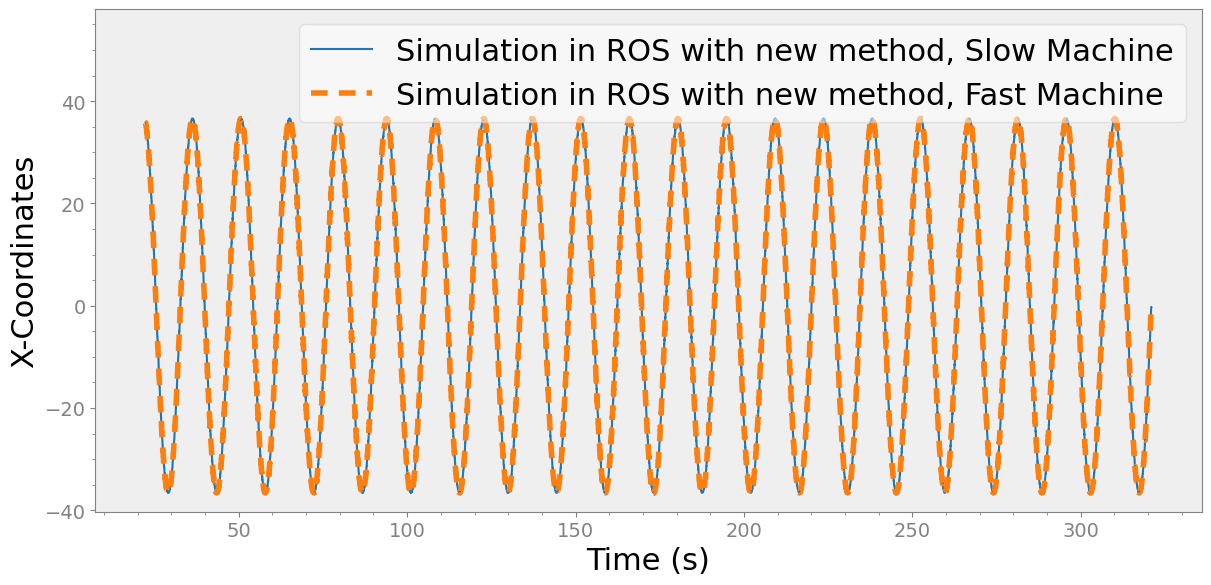

In [61]:
fig, ax = strymread.create_fig(1)
fig.set_figwidth(12)
ax[0].plot(X4_new['Time'][:-50], X4_new['Message'][:-50])
ax[0].plot(X5_new['Time'][:-50], X5_new['Message'][:-50], dashes = [3, 2, 3, 2], linewidth=4)

ax[0].legend(['Simulation in ROS with new method, Slow Machine',
            'Simulation in ROS with new method, Fast Machine'], fontsize = 22, loc = 'upper right')
ax[0].set_ylim(top = 58)
ax[0].set_xlabel('Time (s)', fontsize = 22)
ax[0].set_ylabel('X-Coordinates', fontsize = 22)
ax[0].grid(False, which='both')
fig.savefig("xcoordcomparison_new.png", dpi = 100, bbox_inches='tight', transparent=False)
fig.savefig("xcoordcomparison_new.pdf", facecolor=(1,1,1,0), dpi = 40, bbox_inches='tight', transparent=False)
fig.show()

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Error metric between Two Simulations performed on Slow Computer was 0.39685294349488565


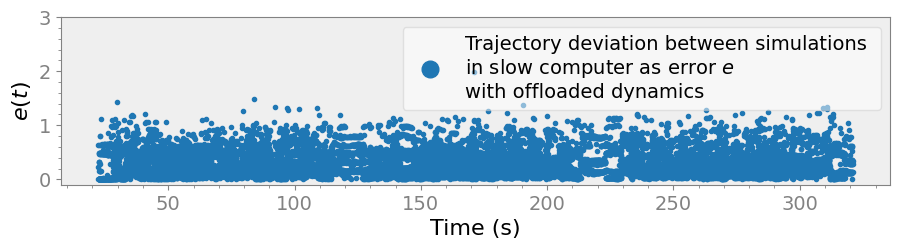

In [62]:
RMS = np.sqrt (  (X4_new['Message'][:-50]  - X5_new['Message'][:-50])**2  + (Y4_new['Message'][:-50]  - Y5_new['Message'][:-50])**2  )

RMS_df = pd.DataFrame(RMS)
RMS_df['Time'] = X4_new['Time'][:-50]

fig, ax = strymread.create_fig(1)
fig.set_figwidth(9)
fig.set_figheight(2)
ax[0].plot(RMS_df['Time'], RMS_df['Message'], marker = 'o', markersize = 3, linewidth = 0)

ax[0].legend(['Trajectory deviation between simulations \nin slow computer as error $e$\nwith offloaded dynamics'], fontsize = 14, loc = 'upper right')
ax[0].set_ylim(top = 3)
ax[0].set_xlabel('Time (s)', fontsize = 16)
ax[0].set_ylabel(r'$e(t)$', fontsize = 16)
ax[0].grid(False, which='both')
fig.savefig("error_new.png", dpi = 100, bbox_inches='tight', transparent=False)
fig.savefig("error_new.pdf", facecolor=(1,1,1,0), dpi = 40, bbox_inches='tight', transparent=False)
fig.show()

E = np.sqrt(np.mean(RMS_df['Message']**2))

print('Error metric between Two Simulations performed on Slow Computer was {}'.format(E))

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/strym-0.3.5-py3.7.egg/strym/strymread.py:2911: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Clock'] = pd.DatetimeIndex(Time).tolist()


Room Mean Square Error between Two Simulations performed on IVORY computer was 0.27298833337544764


/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Error metric between Two Simulations performed on fast Computer was 0.38480146029092094


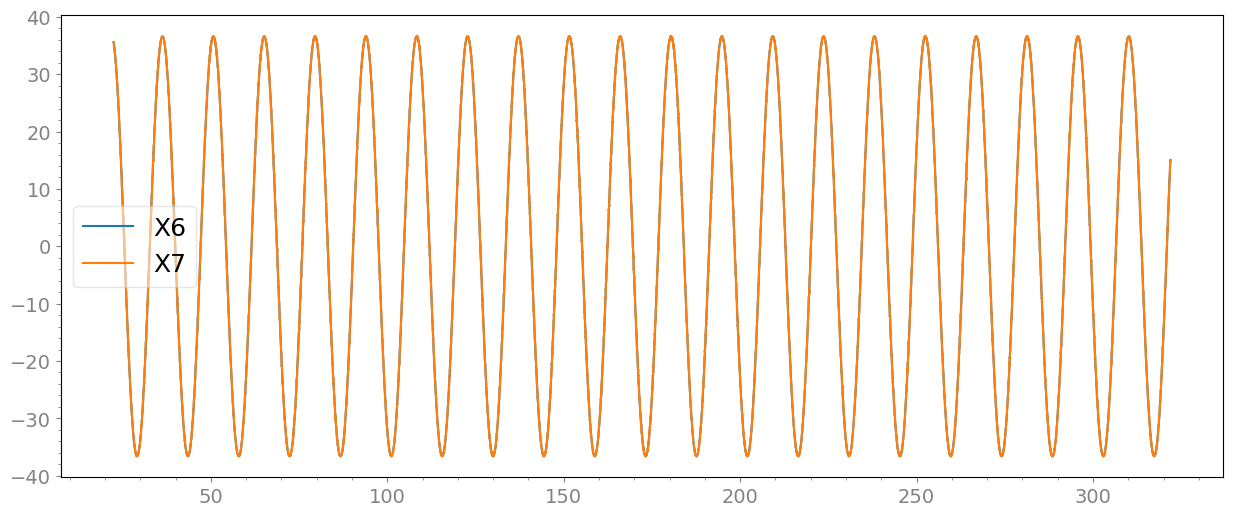

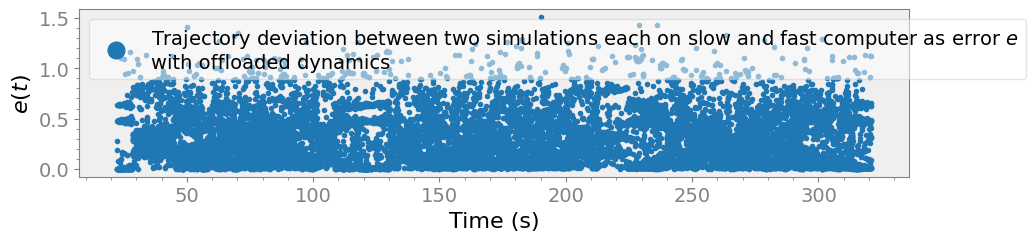

In [63]:
X6_new, X7_new = strymread.ts_sync(X_array[6], X_array[7])
Y6_new, Y7_new = strymread.ts_sync(Y_array[6], Y_array[7])
plt.plot(X6_new['Time'], X7_new['Message'])
plt.plot(X6_new['Time'], X7_new['Message'])
plt.legend(['X6', 'X7'])
rms = sqrt(mean_squared_error(X6_new['Message'],X7_new['Message']))
print('Room Mean Square Error between Two Simulations performed on IVORY computer was {}'.format(rms))

RMS = np.sqrt (  (X6_new['Message'][:-50]  - X7_new['Message'][:-50])**2  + \
               (Y6_new['Message'][:-50]  - Y7_new['Message'][:-50])**2  )

RMS_df = pd.DataFrame(RMS)
RMS_df['Time'] = X6_new['Time'][:-50]

fig, ax = strymread.create_fig(1)
fig.set_figwidth(9)
fig.set_figheight(2)
ax[0].plot(RMS_df['Time'], RMS_df['Message'], marker = 'o', markersize = 3, linewidth = 0)

ax[0].legend(['Trajectory deviation between two simulations each on slow and fast computer as error $e$\nwith offloaded dynamics'], fontsize = 14, loc = 'upper left')
#ax[0].set_ylim(top = 6)
ax[0].set_xlabel('Time (s)', fontsize = 16)
ax[0].set_ylabel(r'$e(t)$', fontsize = 16)
ax[0].grid(False, which='both')
fig.savefig("error_new.png", dpi = 100, bbox_inches='tight', transparent=False)
fig.savefig("error_new.pdf", facecolor=(1,1,1,0), dpi = 40, bbox_inches='tight', transparent=False)
fig.show()

E = np.sqrt(np.mean(RMS_df['Message']**2))

print('Error metric between Two Simulations performed on fast Computer was {}'.format(E))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 0.2536521054771949


/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Error metric between Two Simulations performed on Slow and fast Computer was 0.3621532115745463


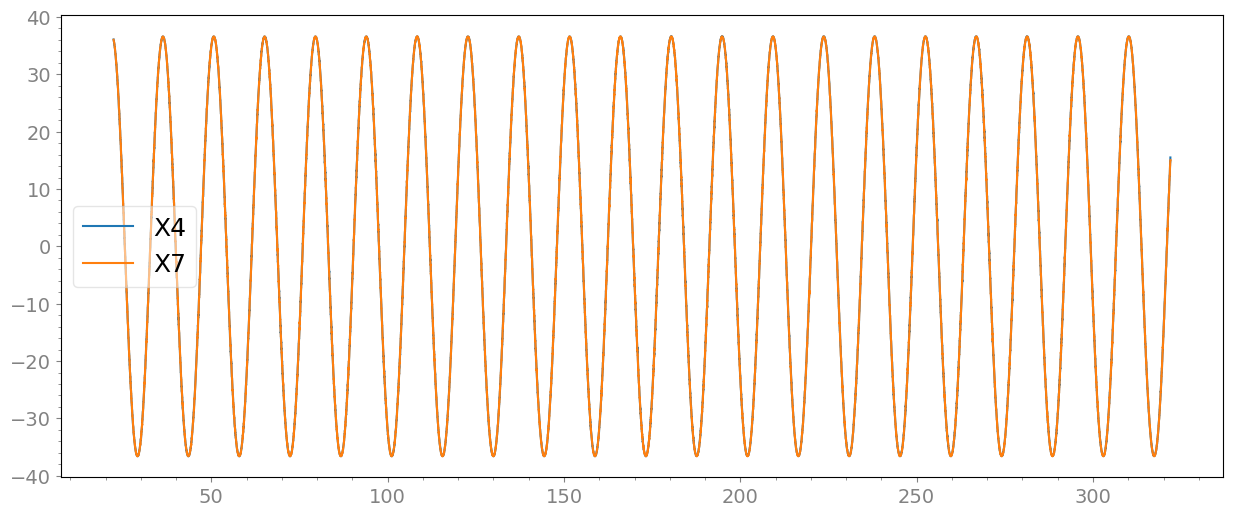

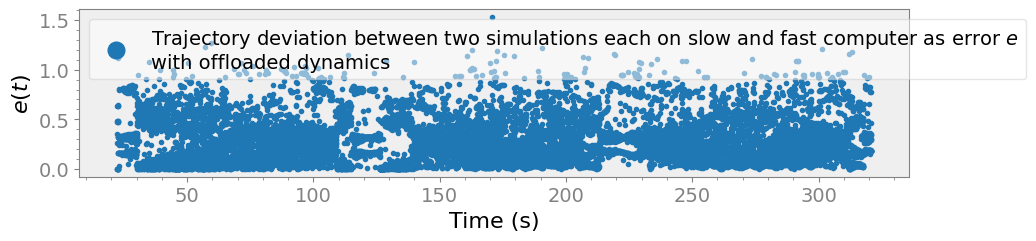

In [64]:
X4_new, X7_new = strymread.ts_sync(X_array[4], X_array[7])
Y4_new, Y7_new = strymread.ts_sync(Y_array[4], Y_array[7])
plt.plot(X4_new['Time'], X4_new['Message'])
plt.plot(X7_new['Time'], X7_new['Message'])
plt.legend(['X4', 'X7'])
rms = sqrt(mean_squared_error(X4_new['Message'],X7_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

RMS = np.sqrt (  (X4_new['Message'][:-50]  - X7_new['Message'][:-50])**2  + \
               (Y4_new['Message'][:-50]  - Y7_new['Message'][:-50])**2  )

RMS_df = pd.DataFrame(RMS)
RMS_df['Time'] = X4_new['Time'][:-50]

fig, ax = strymread.create_fig(1)
fig.set_figwidth(9)
fig.set_figheight(2)
ax[0].plot(RMS_df['Time'], RMS_df['Message'], marker = 'o', markersize = 3, linewidth = 0)

ax[0].legend(['Trajectory deviation between two simulations each on slow and fast computer as error $e$\nwith offloaded dynamics'], fontsize = 14, loc = 'upper left')
#ax[0].set_ylim(top = 6)
ax[0].set_xlabel('Time (s)', fontsize = 16)
ax[0].set_ylabel(r'$e(t)$', fontsize = 16)
ax[0].grid(False, which='both')
fig.savefig("error_new.png", dpi = 100, bbox_inches='tight', transparent=False)
fig.savefig("error_new.pdf", facecolor=(1,1,1,0), dpi = 40, bbox_inches='tight', transparent=False)
fig.show()

E = np.sqrt(np.mean(RMS_df['Message']**2))

print('Error metric between Two Simulations performed on Slow and fast Computer was {}'.format(E))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 0.2751743594746823


/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Error metric between Two Simulations performed on Slow and fast Computer was 0.3877497427551749


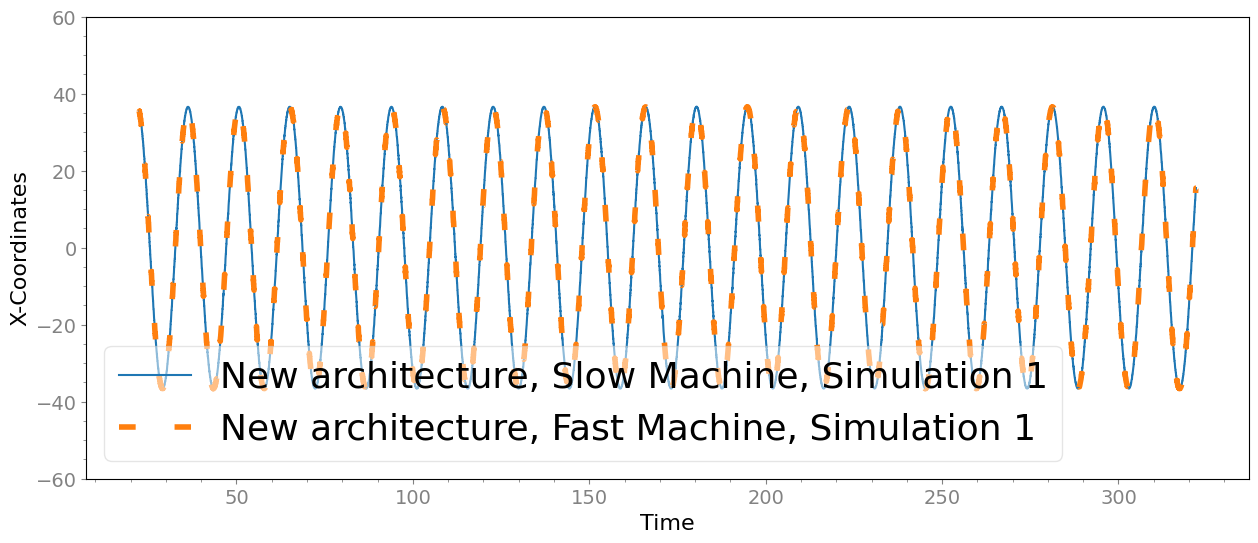

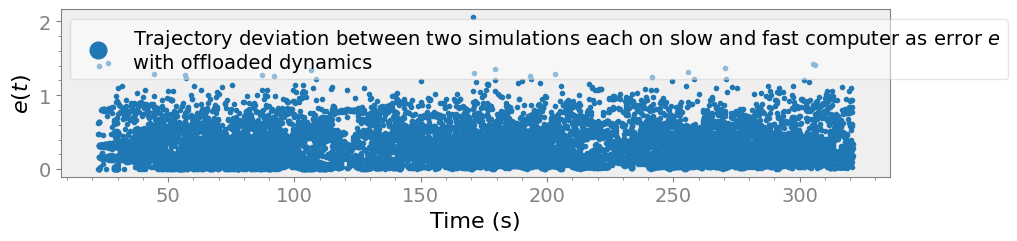

In [65]:
X4_new, X6_new = strymread.ts_sync(X_array[4], X_array[6])
Y4_new, Y6_new = strymread.ts_sync(Y_array[4], Y_array[6])
plt.plot(X4_new['Time'], X4_new['Message'])
plt.plot(X6_new['Time'], X6_new['Message'], dashes = [3, 7, 3, 7], linewidth=4)
plt.legend(['New architecture, Slow Machine, Simulation 1',
            'New architecture, Fast Machine, Simulation 1'], fontsize = 26, markerscale = 4)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('X-Coordinates', fontsize = 16)
plt.ylim(-60, 60)

rms = sqrt(mean_squared_error(X4_new['Message'],X6_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

RMS = np.sqrt (  (X4_new['Message'][:-50]  - X6_new['Message'][:-50])**2  + \
               (Y4_new['Message'][:-50]  - Y6_new['Message'][:-50])**2  )

RMS_df = pd.DataFrame(RMS)
RMS_df['Time'] = X4_new['Time'][:-50]

fig, ax = strymread.create_fig(1)
fig.set_figwidth(9)
fig.set_figheight(2)
ax[0].plot(RMS_df['Time'], RMS_df['Message'], marker = 'o', markersize = 3, linewidth = 0)

ax[0].legend(['Trajectory deviation between two simulations each on slow and fast computer as error $e$\nwith offloaded dynamics'], fontsize = 14, loc = 'upper left')
#ax[0].set_ylim(top = 6)
ax[0].set_xlabel('Time (s)', fontsize = 16)
ax[0].set_ylabel(r'$e(t)$', fontsize = 16)
ax[0].grid(False, which='both')
fig.savefig("error_new.png", dpi = 100, bbox_inches='tight', transparent=False)
fig.savefig("error_new.pdf", facecolor=(1,1,1,0), dpi = 40, bbox_inches='tight', transparent=False)
fig.show()

E = np.sqrt(np.mean(RMS_df['Message']**2))

print('Error metric between Two Simulations performed on Slow and fast Computer was {}'.format(E))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 0.2709537941431023


/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Error metric between Two Simulations performed on Slow and fast Computer was 0.38412530948328727


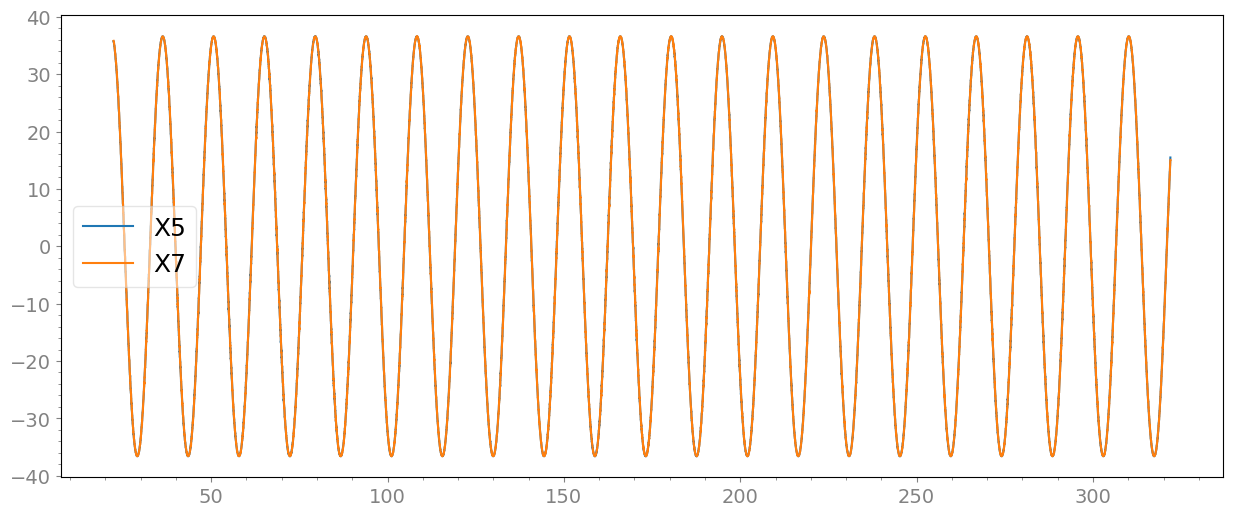

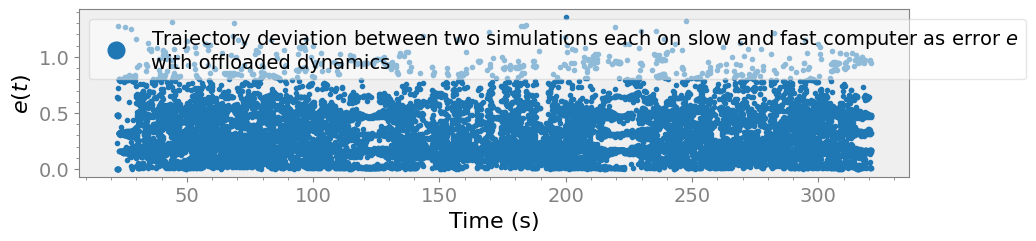

In [66]:
X5_new, X7_new = strymread.ts_sync(X_array[5], X_array[7])
Y5_new, Y7_new = strymread.ts_sync(Y_array[5], Y_array[7])
plt.plot(X5_new['Time'], X5_new['Message'])
plt.plot(X7_new['Time'], X7_new['Message'])
plt.legend(['X5', 'X7'])
rms = sqrt(mean_squared_error(X5_new['Message'],X7_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))

RMS = np.sqrt (  (X5_new['Message'][:-50]  - X7_new['Message'][:-50])**2  + \
               (Y5_new['Message'][:-50]  - Y7_new['Message'][:-50])**2  )

RMS_df = pd.DataFrame(RMS)
RMS_df['Time'] = X5_new['Time'][:-50]

fig, ax = strymread.create_fig(1)
fig.set_figwidth(9)
fig.set_figheight(2)
ax[0].plot(RMS_df['Time'], RMS_df['Message'], marker = 'o', markersize = 3, linewidth = 0)

ax[0].legend(['Trajectory deviation between two simulations each on slow and fast computer as error $e$\nwith offloaded dynamics'], fontsize = 14, loc = 'upper left')
#ax[0].set_ylim(top = 6)
ax[0].set_xlabel('Time (s)', fontsize = 16)
ax[0].set_ylabel(r'$e(t)$', fontsize = 16)
ax[0].grid(False, which='both')
fig.savefig("error_new.png", dpi = 100, bbox_inches='tight', transparent=False)
fig.savefig("error_new.pdf", facecolor=(1,1,1,0), dpi = 40, bbox_inches='tight', transparent=False)
fig.show()

E = np.sqrt(np.mean(RMS_df['Message']**2))

print('Error metric between Two Simulations performed on Slow and fast Computer was {}'.format(E))

Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was 0.2606542350591623


/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Error metric between Two Simulations performed on Slow and fast Computer was 0.3693760282968343


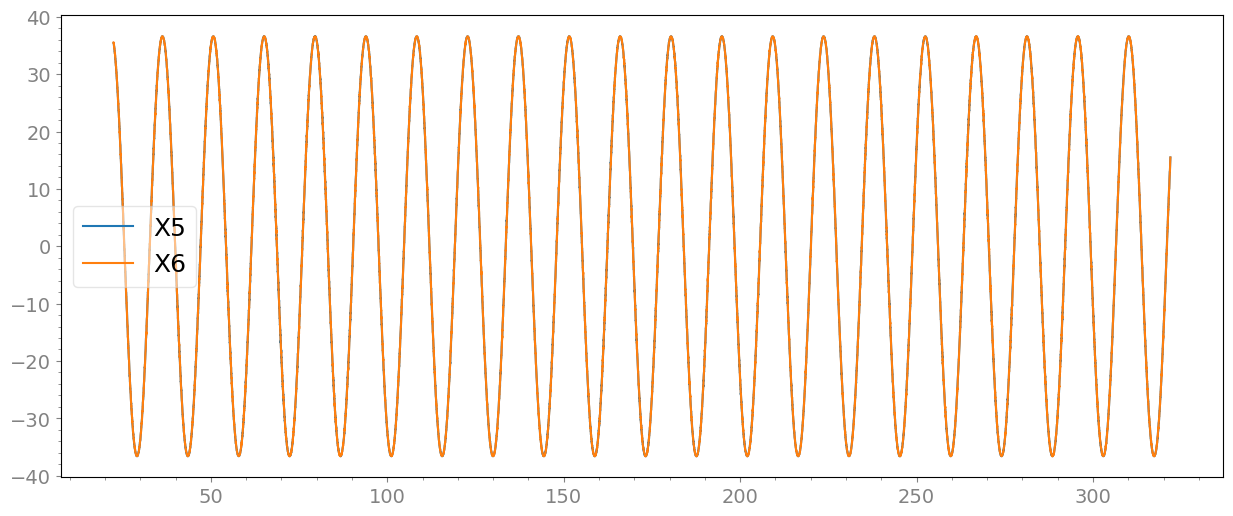

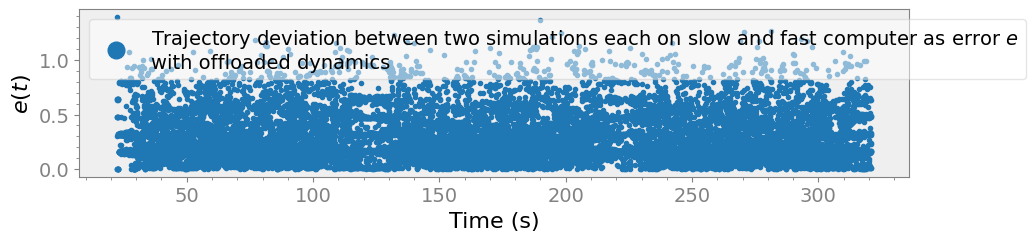

In [67]:
X5_new, X6_new = strymread.ts_sync(X_array[5], X_array[6])
Y5_new, Y6_new = strymread.ts_sync(Y_array[5], Y_array[6])
plt.plot(X5_new['Time'], X5_new['Message'])
plt.plot(X6_new['Time'], X6_new['Message'])
plt.legend(['X5', 'X6'])
rms = sqrt(mean_squared_error(X5_new['Message'],X6_new['Message']))
print('Room Mean Square Error between Two Simulations performed on two computers: REU and IVORY was {}'.format(rms))


RMS = np.sqrt (  (X5_new['Message'][:-50]  - X6_new['Message'][:-50])**2  + \
               (Y5_new['Message'][:-50]  - Y6_new['Message'][:-50])**2  )

RMS_df = pd.DataFrame(RMS)
RMS_df['Time'] = X5_new['Time'][:-50]

fig, ax = strymread.create_fig(1)
fig.set_figwidth(9)
fig.set_figheight(2)
ax[0].plot(RMS_df['Time'], RMS_df['Message'], marker = 'o', markersize = 3, linewidth = 0)

ax[0].legend(['Trajectory deviation between two simulations each on slow and fast computer as error $e$\nwith offloaded dynamics'], fontsize = 14, loc = 'upper left')
#ax[0].set_ylim(top = 6)
ax[0].set_xlabel('Time (s)', fontsize = 16)
ax[0].set_ylabel(r'$e(t)$', fontsize = 16)
ax[0].grid(False, which='both')
fig.savefig("error_new.png", dpi = 100, bbox_inches='tight', transparent=False)
fig.savefig("error_new.pdf", facecolor=(1,1,1,0), dpi = 40, bbox_inches='tight', transparent=False)
fig.show()

E = np.sqrt(np.mean(RMS_df['Message']**2))

print('Error metric between Two Simulations performed on Slow and fast Computer was {}'.format(E))